In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import gower

# Read in the CSV file
df = pd.read_csv('selected_data1.csv')
# Filter the dataframe for rows where 'solved' column is 0
filtered_df = df[df['Solved'] == 0]

# Sample 
sampled_df = filtered_df.sample(frac=0.005, random_state=42) 



In [13]:
# Compute the Gower distance matrix
distance_matrix = gower.gower_matrix(sampled_df)
distance_matrix_df = pd.DataFrame(distance_matrix)


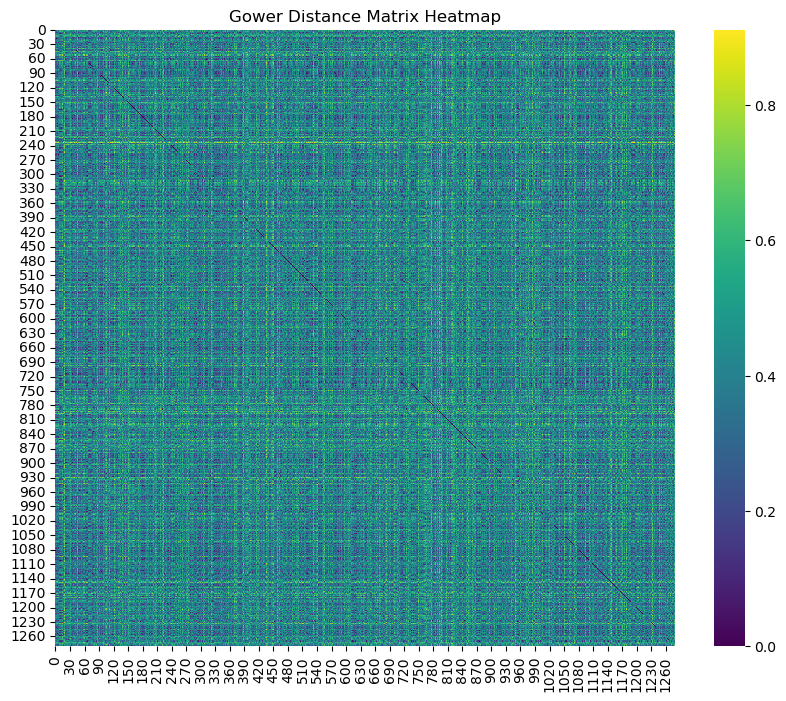

In [14]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix_df, cmap='viridis')
plt.title('Gower Distance Matrix Heatmap')
plt.show()

C:\Users\megan\AppData\Local\Temp\ipykernel_42788\1442382415.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


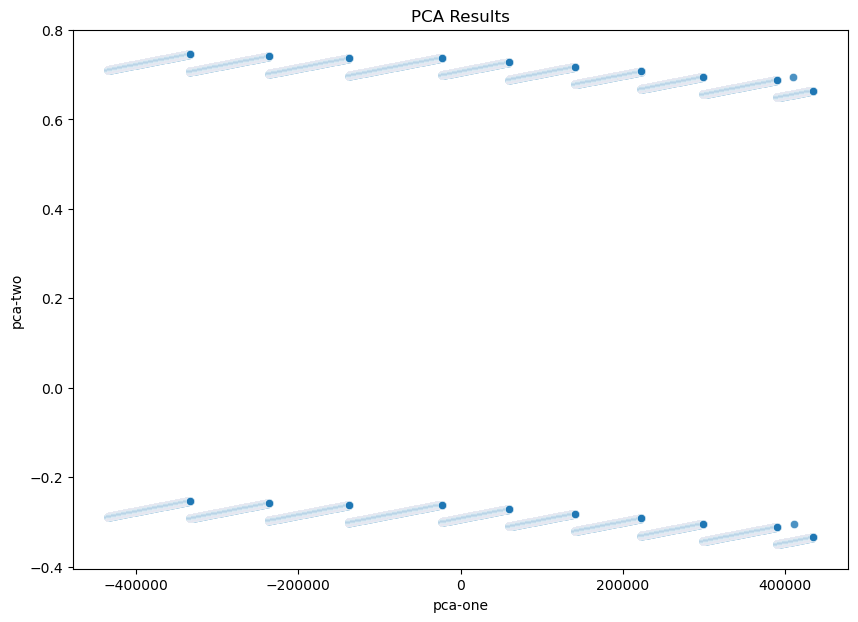

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(df.select_dtypes(include=[np.number]))

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hsv", 10),
    data=df,
    legend="full",
    alpha=0.8
)
plt.title('PCA Results')
plt.show()


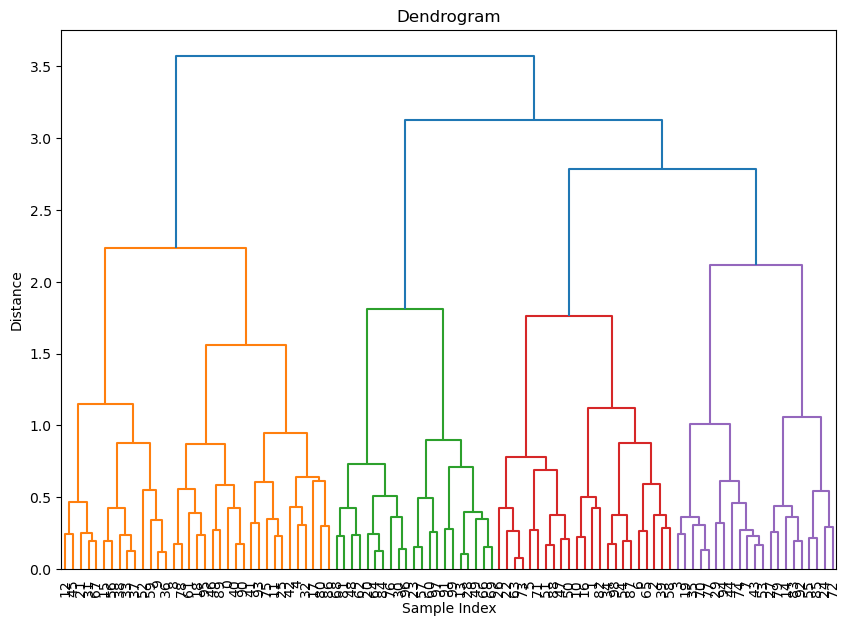

In [16]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(100, 4)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=['VicSex', 'year_intervals', 'death_penalty_active', 'geopolitical_region'])

# Performing hierarchical clustering
Z = linkage(df, method='ward')  # 'ward' method is one of the options

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


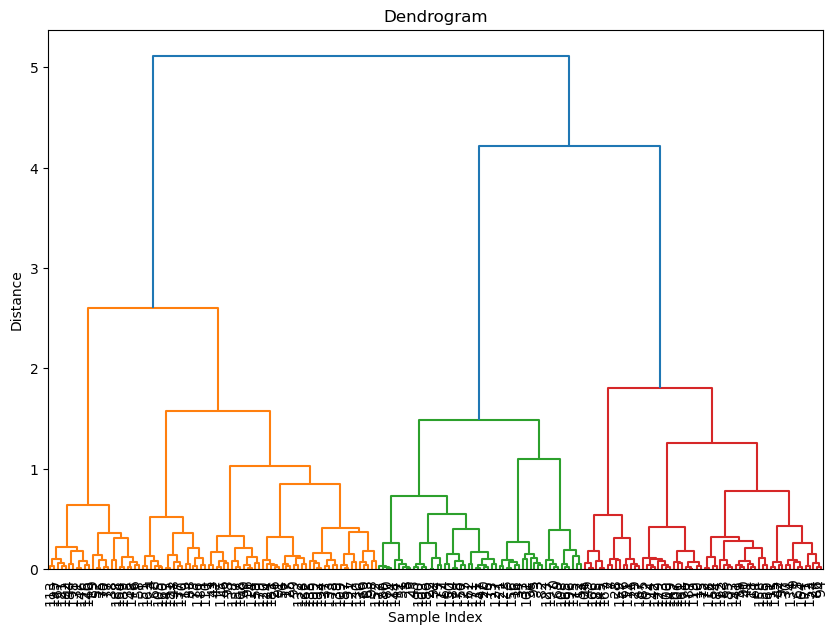

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

#

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(200, 2)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=[ 'death_penalty_active', 'geopolitical_region'])

# Performing hierarchical clustering
Z = linkage(df, method='ward')  # 'ward' method is one of the options

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


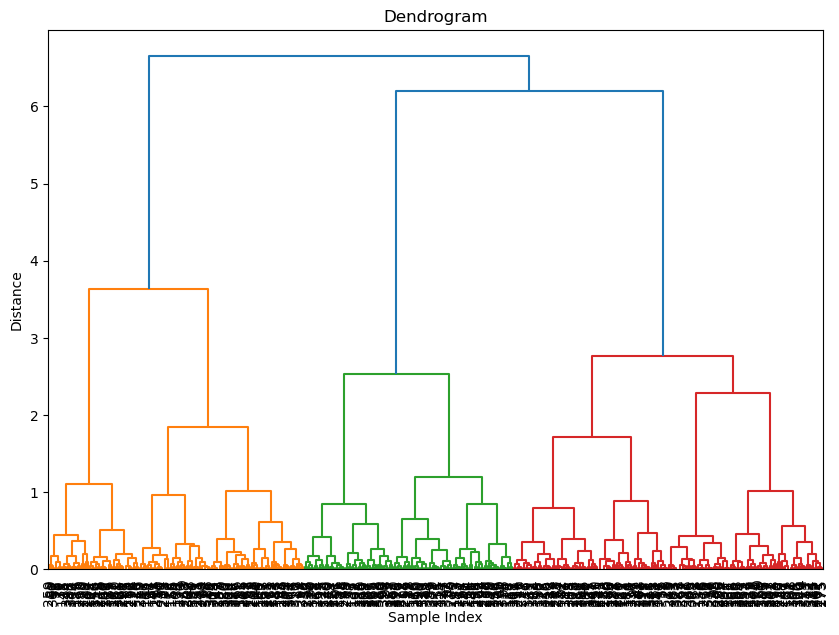

In [18]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

#

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(400, 2)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=[ 'VicSex', 'year_intervals'])

# Performing hierarchical clustering
Z = linkage(df, method='ward')  # 'ward' method is one of the options

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

c:\Users\megan\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warnin

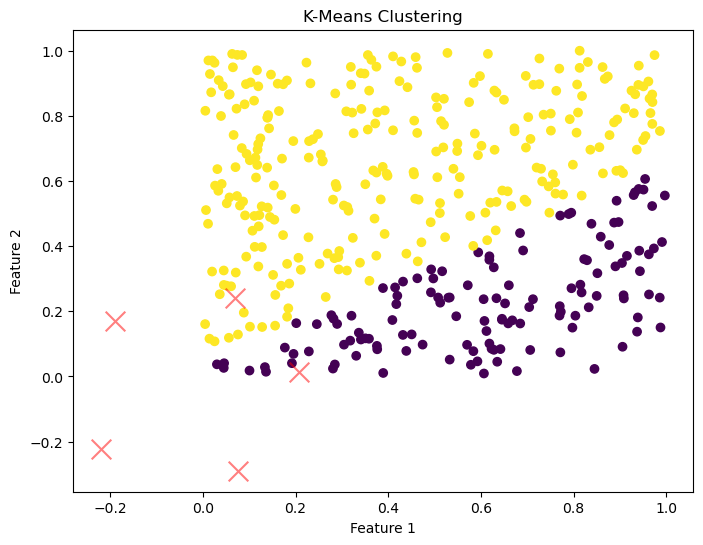

       VicSex  year_intervals  Cluster
0    0.374540        0.950714        4
1    0.731994        0.598658        4
2    0.156019        0.155995        4
3    0.058084        0.866176        4
4    0.601115        0.708073        4
..        ...             ...      ...
395  0.153351        0.586230        4
396  0.505889        0.611454        4
397  0.018110        0.872124        4
398  0.932118        0.565133        0
399  0.696651        0.922499        4

[400 rows x 3 columns]


In [19]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
# Apply Multi-Dimensional Scaling (MDS) to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed')
X_reduced = mds.fit_transform(distance_matrix)



# Convert the data into a DataFrame (optional, for convenience)
df = pd.DataFrame(sampled_df, columns=[ 'VicSex', 'year_intervals'])

# Apply K-Means Clustering
# n_clusters is the number of clusters to form (K)
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans.fit(X_reduced)
labels = kmeans.labels_
# The cluster centers
centers = kmeans.cluster_centers_
# The cluster centers
centers = kmeans.cluster_centers_

# Predict the cluster for each data point
labels = kmeans.predict(df)

# Add cluster information to the DataFrame
df['Cluster'] = labels

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['VicSex'], df['year_intervals'], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(df)


c:\Users\megan\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\megan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warnin

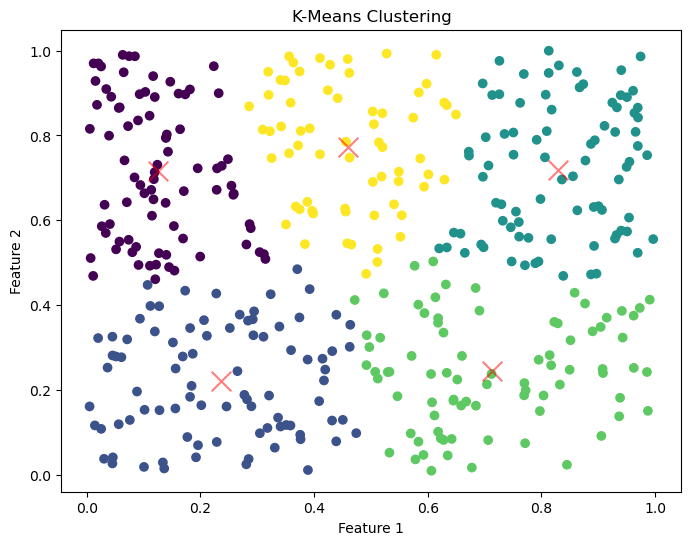

       VicSex  year_intervals  Cluster
0    0.374540        0.950714        4
1    0.731994        0.598658        4
2    0.156019        0.155995        4
3    0.058084        0.866176        4
4    0.601115        0.708073        4
..        ...             ...      ...
395  0.153351        0.586230        4
396  0.505889        0.611454        4
397  0.018110        0.872124        4
398  0.932118        0.565133        0
399  0.696651        0.922499        4

[400 rows x 3 columns]


In [20]:
from sklearn.manifold import MDS
# Apply Multi-Dimensional Scaling (MDS) to reduce dimensionality
mds = MDS(n_components=2, dissimilarity='precomputed')
X_reduced = mds.fit_transform(distance_matrix)

# Convert the data into a DataFrame (optional, for convenience)
X_reduced = pd.DataFrame(sampled_df, columns=[ 'death_penalty_active', 'geopolitical_region'])

# Apply K-Means Clustering
# n_clusters is the number of clusters to form (K)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_reduced )
kmeans.fit(X_reduced)
labels = kmeans.labels_
# The cluster centers
centers = kmeans.cluster_centers_

# Predict the cluster for each data point
labels = kmeans.predict(X_reduced)

# Add cluster information to the DataFrame
X_reduced['Cluster'] = labels

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced['death_penalty_active'], X_reduced['geopolitical_region'], c=X_reduced['Cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(df)

     death_penalty_active  geopolitical_region  Cluster
0                0.374540             0.950714        0
1                0.731994             0.598658        0
2                0.156019             0.155995        1
3                0.058084             0.866176        0
4                0.601115             0.708073        0
..                    ...                  ...      ...
395              0.153351             0.586230        0
396              0.505889             0.611454        0
397              0.018110             0.872124        0
398              0.932118             0.565133        0
399              0.696651             0.922499        0

[400 rows x 3 columns]


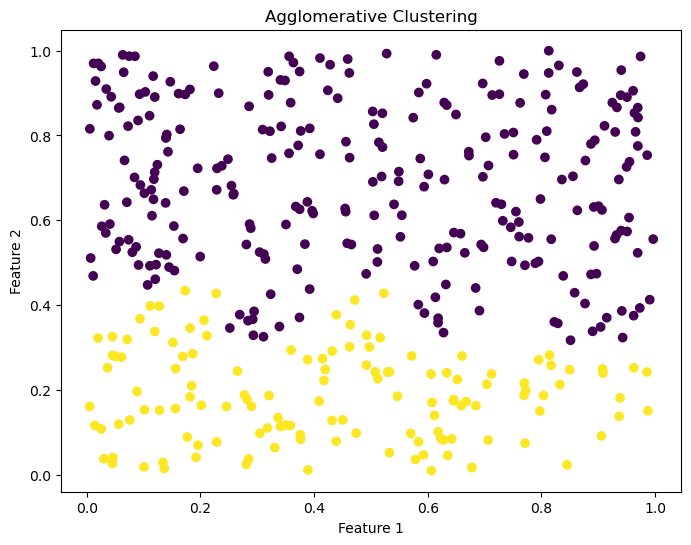

In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd



# Convert the data into a DataFrame (optional, for convenience)
df = pd.DataFrame(sampled_df, columns=[ 'death_penalty_active', 'geopolitical_region'])

# Apply Agglomerative Clustering
# n_clusters is the number of clusters to form
agg_clustering = AgglomerativeClustering(n_clusters=2).fit(df)

# Get cluster labels
labels = agg_clustering.labels_

# Add cluster information to the DataFrame
df['Cluster'] = labels

# Print the DataFrame with cluster labels
print(df)




# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['death_penalty_active'], df['geopolitical_region'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


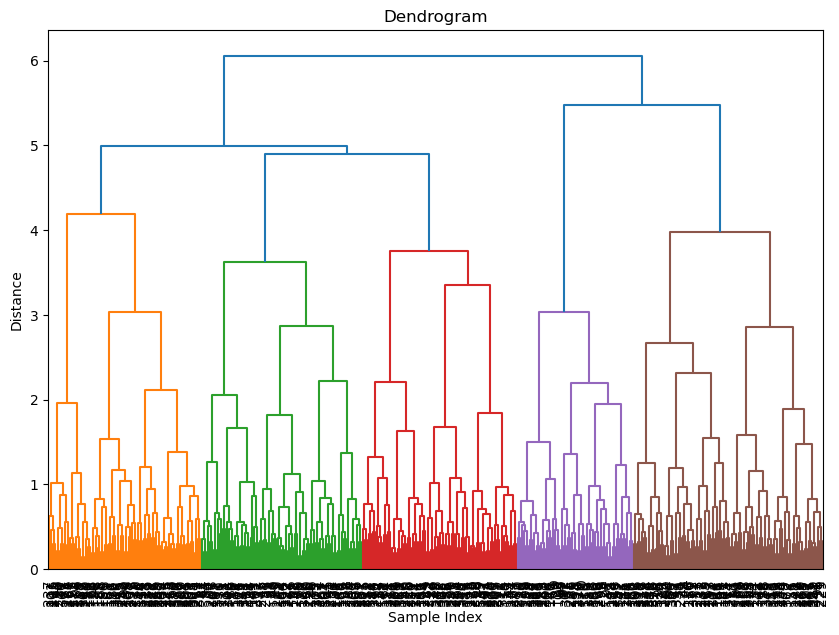

In [23]:

np.random.seed(42)  # For reproducible results
sampled_df = np.random.rand(400, 6)  # 10 samples with 4 features each
df = pd.DataFrame(sampled_df , columns=[ 'VicSex', 'year_intervals','death_penalty_active', 'geopolitical_region','weapon_category','political_affiliation'])

# Performing hierarchical clustering
Z = linkage(df, method='ward')  # 'ward' method is one of the options

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the size as needed
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()